In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.insert(0,'../..')
import omama as O
import pickle
from hyperopt import hp, rand, fmin, Trials
from pyod.models.knn import KNN

In [3]:
# load data and labels

with open('/raid/mpsych/datasetA.pkl','rb') as f:
    datasetA = pickle.load(f)
    
with open('/raid/mpsych/datasetA_labels.pkl', 'rb') as f1:
    labels = np.asarray(pickle.load(f1))

In [4]:
# determine the hyperparameter space

param_grid = {
    'contamination': hp.uniform('contamination', 0.07, .1),
    'n_neighbors': hp.uniformint('n_neighbors', 1, 50),
    'method': hp.choice('method', ['largest', 'mean', 'median']),
    'radius': hp.quniform('radius', 0.0, 5.0, .1),
    'leaf_size': hp.uniformint('leaf_size', 1, 100),
    'metric': hp.choice('metric', ['minkowski', 'cityblock', 'euclidean', 'l1', 'l2', 'manhattan', 
                                  ]),
    'p': hp.uniformint('p', 1, 10),
    'n_jobs': hp.uniformint('n_jobs', 1, 4)
}

In [5]:
hyperOpt = O.HyperTuner(
    algorithm=KNN,
    param_space=param_grid,
    feature_type='hist',
    norm_type='gaussian',
    data=datasetA,
    gt_labels=labels,
    max_evals=50,
    sigma=20
)

HyperTuner initializing, please be patient...


In [11]:
hyperOpt.max_evals = 100

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  2.52trial/s, best loss: -0.825]
Best parameters:
contamination: 0.091466753773393
leaf_size: 12.0
method: median
metric: euclidean
n_jobs: 3.0
n_neighbors: 44.0
p: 7.0
radius: 4.1000000000000005


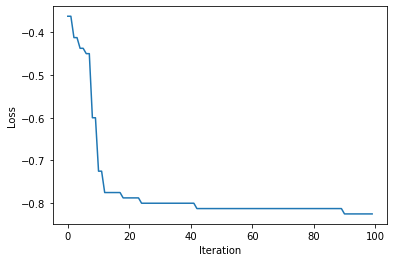

In [12]:
hyperOpt.optimize()

In [13]:
hyperOpt.display_best_params()

Best parameters:
contamination: 0.091466753773393
leaf_size: 12.0
method: median
metric: euclidean
n_jobs: 3.0
n_neighbors: 44.0
p: 7.0
radius: 4.1000000000000005


In [14]:
hyperOpt.print_param_space()

Parameter space:
contamination: ['0.07', '0.1']
n_neighbors: ['1', '50', '1.0']
method: ['largest', 'mean', 'median']
radius: ['0.0', '5.0', '0.1']
leaf_size: ['1', '100', '1.0']
metric: ['minkowski', 'cityblock', 'euclidean', 'l1', 'l2', 'manhattan']
p: ['1', '10', '1.0']
n_jobs: ['1', '4', '1.0']


In [15]:
print(type(hyperOpt.param_space))

<class 'dict'>


In [18]:
print(hyperOpt)

HyperTuner
